<a href="https://colab.research.google.com/github/sidds4474/Mobile-Price-Range-Classification-ML/blob/main/Mobile_Price_Range_Classification_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Mobile Price Range Classification </u></b>

## *Problem Description : In this competitive market compnaies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of mobile phone(eg. RAM, Internal Memory, etc.) and its selling price. In this problem, we don have to predict price but a price range indicating how hiight the price is.*

# Attributes in this data:

**id**: ID

**battery_power**: Total energy a battery can store in one time measured in mAh

**blue**: Has bluetooth or not

**clock_speed**: speed at which microprocessor executes instructions

**dual_sim**: Has dual sim support or not
fc:Front Camera mega pixels

**four_g**: Has 4G or not

**int_memory**: Internal Memory in Gigabytes
m_dep:Mobile Depth in cm

**mobile_wt**: Weight of mobile phone

**n_cores**: Number of cores of processor

**pc**: Primary Camera mega pixels

**px_height**: Pixel Resolution Height

**px_width**: Pixel Resolution Width

**ram**: Random Access Memory in Megabytes

**sc_h**: Screen Height of mobile in cm

**sc_w**: Screen Width of mobile in cm

**talk_time**: Longest time that a single battery charge will last when you are

**three_g**: Has 3G or not

**touch_screen**: Has touch screen or not

**wifi**: Has wifi or not

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 999
import seaborn as sns

In [3]:
# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Reading the data file

data = pd.read_csv('/content/drive/MyDrive/Mobile Price Range Prediction - Capstone Project/data_mobile_price_range.csv',encoding = 'latin' )

In [5]:
data.head(-5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,1617,1,2.4,0,8,1,36,0.8,85,1,9,743,1426,296,5,3,7,1,0,0,0
1991,1882,0,2.0,0,11,1,44,0.8,113,8,19,4,743,3579,19,8,20,1,1,0,3
1992,674,1,2.9,1,1,0,21,0.2,198,3,4,576,1809,1180,6,3,4,1,1,1,0
1993,1467,1,0.5,0,0,0,18,0.6,122,5,0,888,1099,3962,15,11,5,1,1,1,3


In [6]:
# Learning about the rows and colums

data.shape


(2000, 21)

In [7]:
# Getting all the columns name

data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [8]:
# Data type of columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
# Unique values
data.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


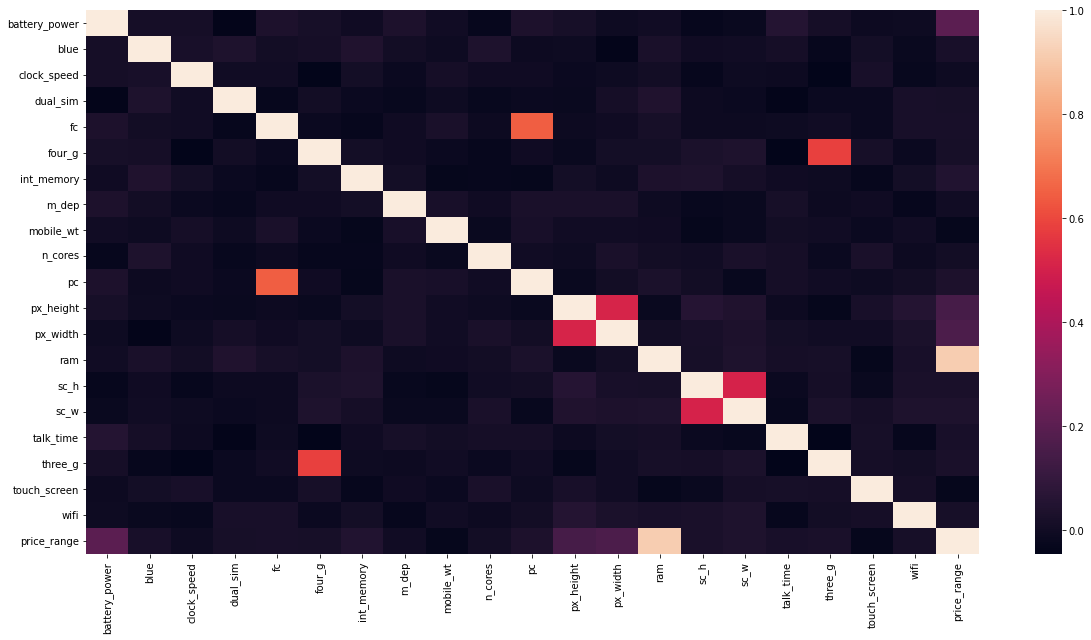

In [11]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr())
plt.show()

## Plotting Relation between Price Range & Battery Power

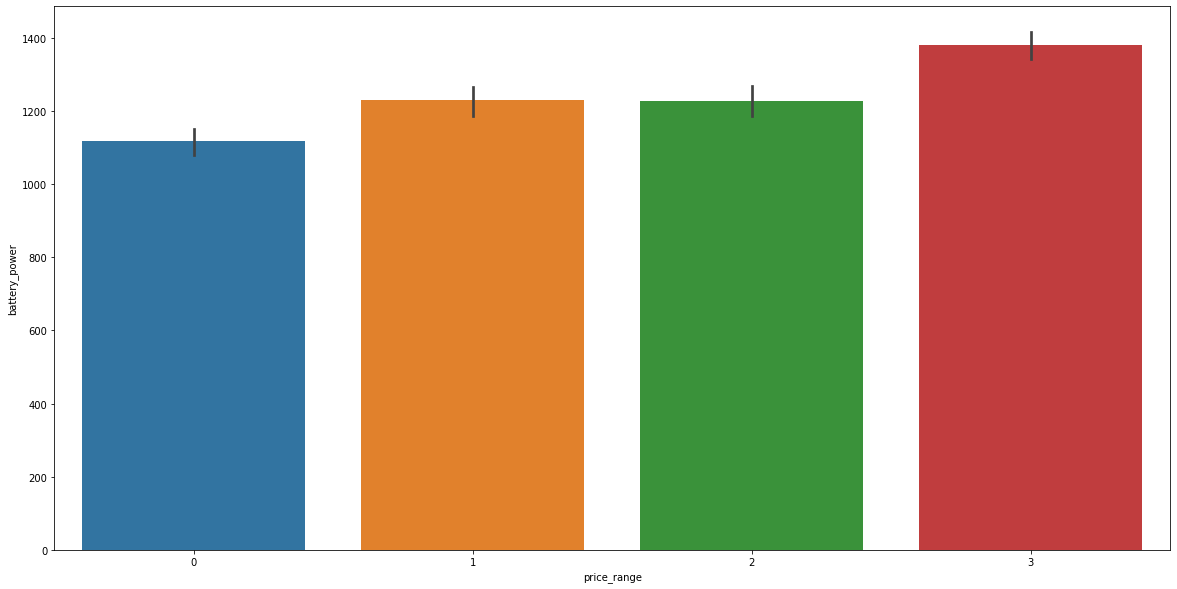

In [12]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'price_range', y = 'battery_power', data=data)
plt.show()

## Plotting Relation between Price Range & Pixel Height/Width

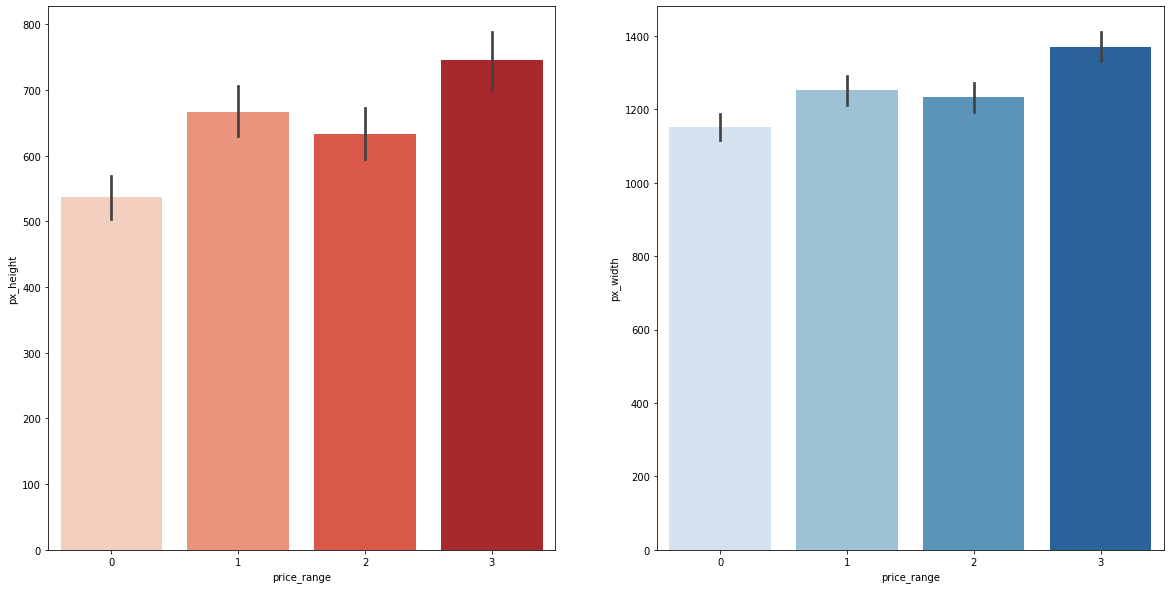

In [13]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
sns.barplot(x = 'price_range', y = 'px_height', data=data, palette = 'Reds')
plt.subplot(1,2,2)
sns.barplot(x = 'price_range', y = 'px_width', data=data , palette = 'Blues')
plt.show()

## Plotting Relation between Price Range & RAM

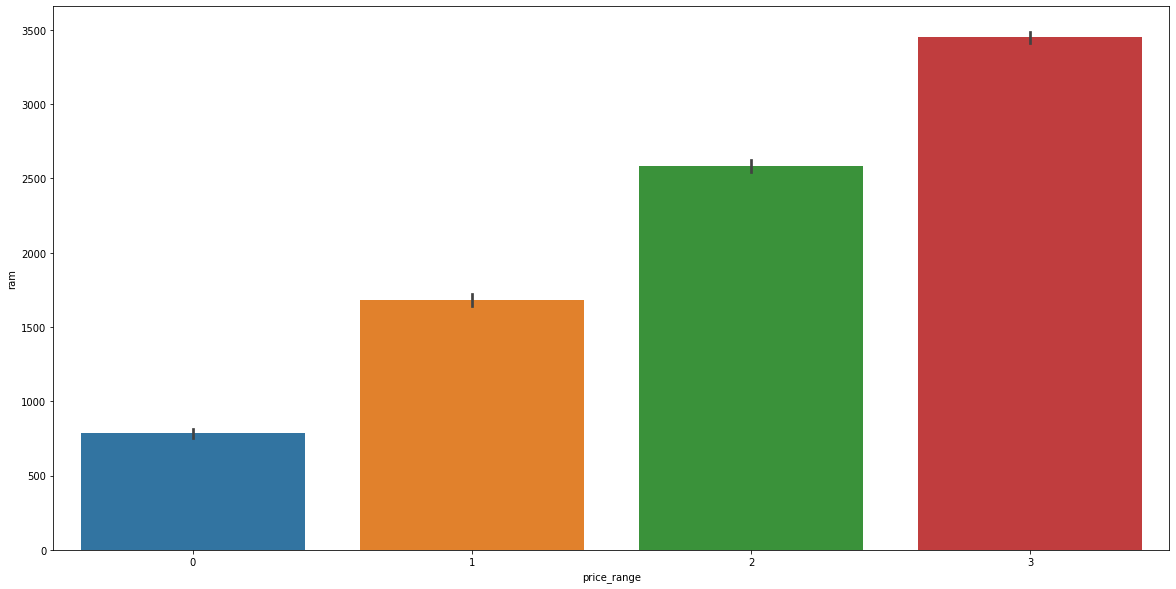

In [14]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'price_range', y = 'ram',data=data)
plt.show()

## Plotting Relation between Price Range & 3G/4G

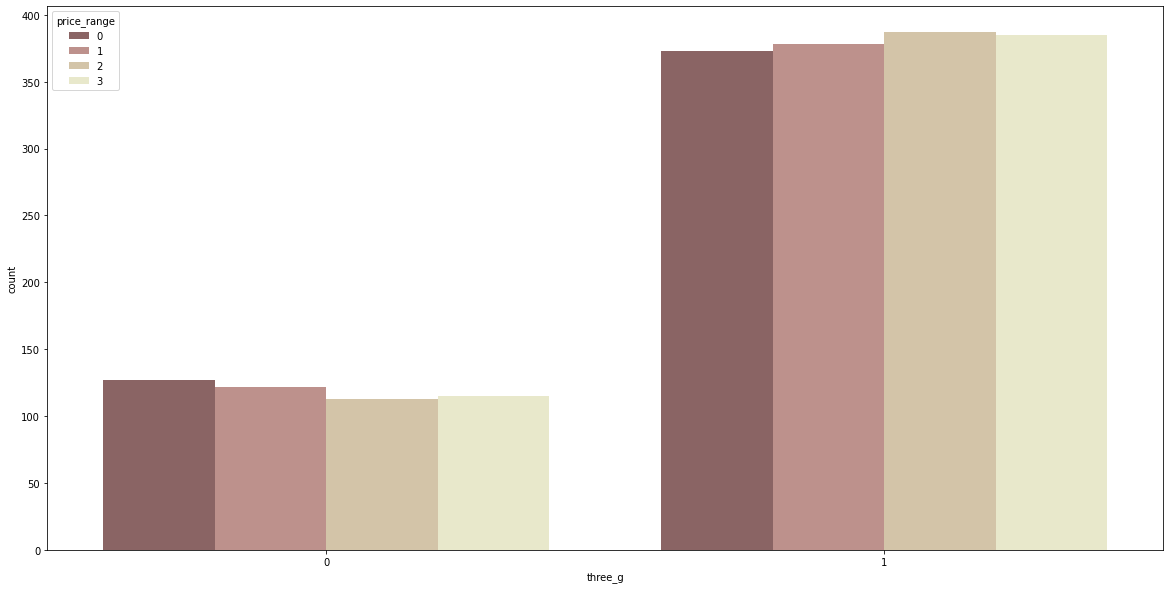

In [18]:
plt.figure(figsize = (20,10))
sns.countplot(data['three_g'] , hue = data['price_range'] , palette = 'pink')
plt.show()

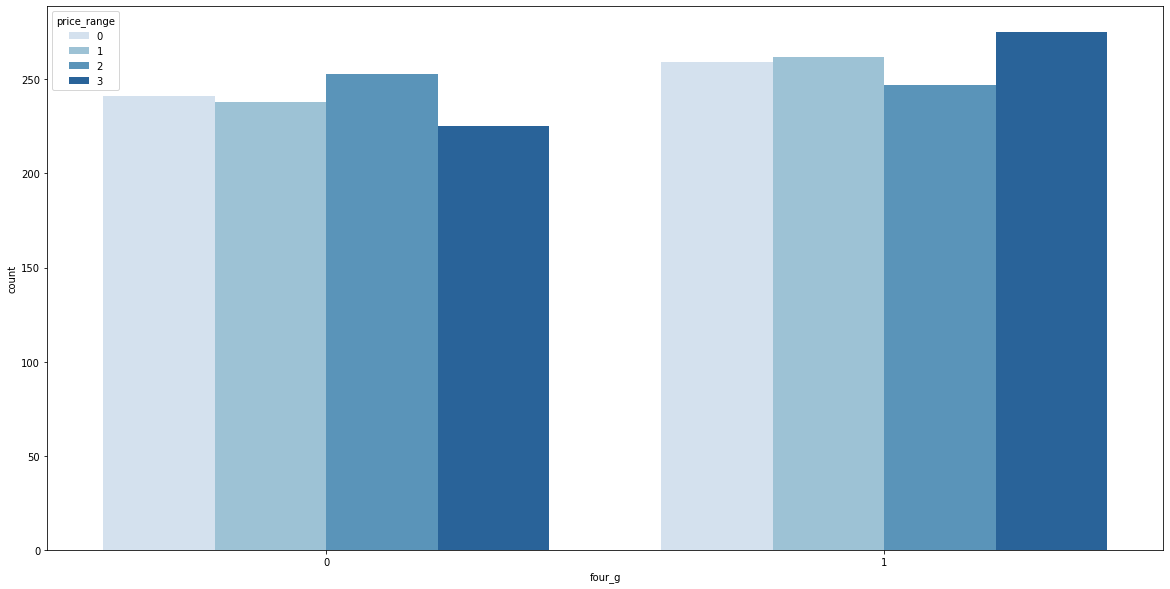

In [22]:
plt.figure(figsize = (20,10))
sns.countplot(data['four_g'] , hue = data['price_range'] , palette = 'Blues')
plt.show()

## Plotting Relation between Price Range & Memory

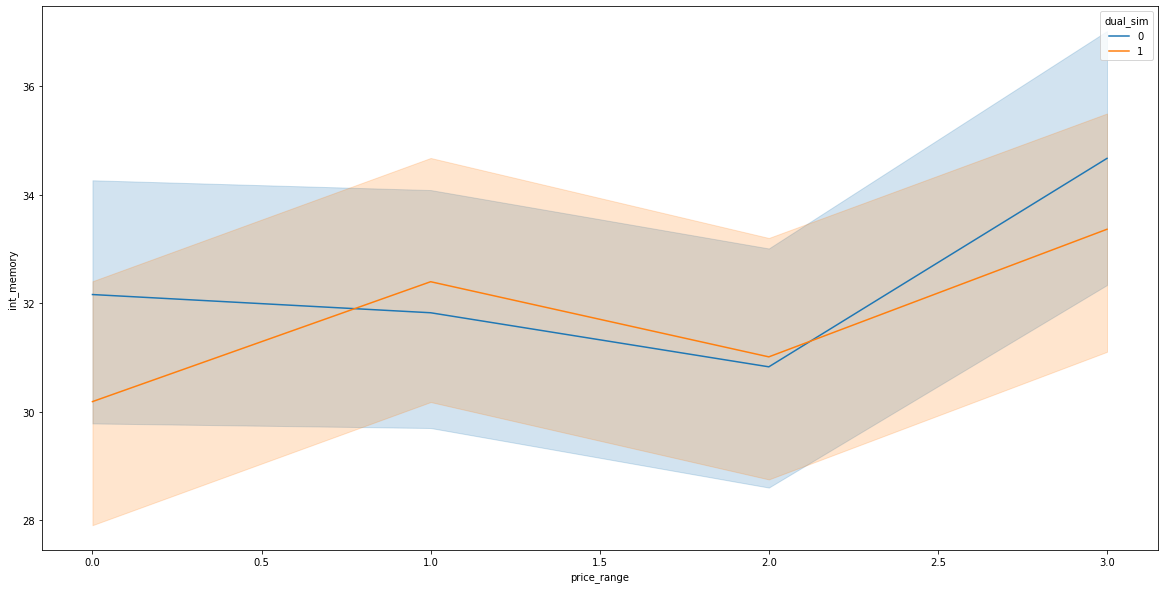

In [19]:
plt.figure(figsize = (20,10))
sns.lineplot(x = 'price_range' , y = 'int_memory' , data = data , hue = 'dual_sim')
plt.show()